In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [4]:
path = r'C:\Users\ROSHAN\Documents\GitHub\Lane-Detection\Images\test_image.jpg'

image = cv2.imread(path)

cv2.imshow('result', image)
cv2.waitKey(0)

-1

In [3]:
#GrayScaling

lane_image = np.copy(image)

gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2.imshow('result', gray)
cv2.waitKey(0)

-1

In [5]:
#Reducing Image Noise & Filtering (Gaussian blur)

blur = cv2.GaussianBlur(gray , (5,5), 0)
cv2.imshow('result', blur)
cv2.waitKey(0)

-1

In [6]:
#Canny edge detection itself applies gaussian filters

canny = cv2.Canny(blur ,50 , 150)

cv2.imshow('result', canny)
cv2.waitKey(0)

-1

In [8]:
lane_image = np.copy(image)  #Ensure making copies when making arrays

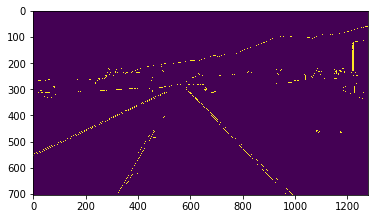

In [9]:
def canny(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray , (5,5), 0)
    canny = cv2.Canny(blur ,50 , 150)
    
    return canny

plt.imshow(canny(lane_image))
plt.show()

In [10]:
canny1 = canny(lane_image)

In [11]:
canny1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
def region_of_interest(image):
    
    height = image.shape[0]
    
    polygons = np.array([[(200, height),(1100 , height), (550 , 250)]])  #Creating a triangular mask
    
    mask = np.zeros_like(image)  #Black pixels
    
    cv2.fillPoly(mask , polygons , 255) #Fill mask with triangle dimensions as white(255)
    
    return mask

cv2.imshow('result', region_of_interest(canny1))
cv2.waitKey(0)

-1

In [13]:
def region_of_interest_masked(image):
    
    height = image.shape[0]
    
    polygons = np.array([[(200, height),(1100 , height), (550 , 250)]])  #Creating a triangular mask
    
    mask = np.zeros_like(image)  #Black pixels
    
    cv2.fillPoly(mask , polygons , 255) #Fill mask with triangle dimensions as white(255)
    
    mask = cv2.bitwise_and(image , mask)
    
    return mask

cv2.imshow('result', region_of_interest_masked(canny1))
cv2.waitKey(0)

-1

In [14]:
cropped_image = region_of_interest_masked(canny1)

In [15]:
lines = cv2.HoughLinesP(cropped_image , 2 , np.pi/180 , 100 , np.array([]), minLineLength = 40 , maxLineGap = 5)

#averaged_lines = average_slope_intercept()

In [16]:
def display_lines(image, lines):
    
    line_image = np.zeros_like(image)
    
    if lines is not None:
        
        for line in lines:
            
            x1 , y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1) ,(x2,y2), (255,0,0), 10)
               
    return line_image

line_image = display_lines(lane_image , lines)


cv2.imshow('result', line_image)
cv2.waitKey(0)

-1

In [17]:
def make_cordinates(image , line_parameters):
    
    slope , intercept = line_parameters    
    
    y1 = image.shape[0]
    
    y2  = int(y1*(3/5))
    
    x1 = int((y1 - intercept)/slope)
    
    x2 = int((y2 - intercept)/slope)
    
    return np.array([x1, y1 , x2 , y2])

def average_slope_intercept(image , lines):
    
    left_fit = []
    right_fit = []
    
    for line in lines:
        
        x1, y1 , x2 , y2 = line.reshape(4)
        
        parameters = np.polyfit((x1 , x2), (y1, y2), 1)
        
        slope = parameters[0]
        
        intercept = parameters[1]
        
        if slope < 0:
            
            left_fit.append((slope , intercept))
        else:
            
            right_fit.append((slope , intercept))
            
    left_fit_average = np.average(left_fit , axis = 0)
    right_fit_average = np.average(right_fit , axis = 0)
        
    left_line = make_cordinates(image , left_fit_average)
        
    right_line = make_cordinates(image , right_fit_average)
    
    return np.array([left_line , right_line])
        
        
        
    
    
averaged_lines = average_slope_intercept(lane_image , lines)

In [18]:
def display_lines(image, lines):
    
    line_image = np.zeros_like(image)
    
    if lines is not None:
        
        for line in lines:
            
            x1 , y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1) ,(x2,y2), (255,0,0), 10)
               
    return line_image

line_image = display_lines(lane_image , averaged_lines)

combo_image = cv2.addWeighted(lane_image , 0.8, line_image , 1, 1)
cv2.imshow('result', combo_image)
cv2.waitKey(0)

-1

In [ ]:
combo_image = cv2.addWeighted(lane_image , 0.8, line_image , 1, 1)

cv2.imshow('result', combo_image)
cv2.waitKey(0)

In [28]:
#VIDEO

cap = cv2.VideoCapture(r'C:\Users\ROSHAN\Lane Detection\Videos\test2.mp4')

while(cap.isOpened()):
    
    _ , frame = cap.read()
    
    canny1 = canny(frame)
    
    cropped_image = region_of_interest_masked(canny1)
    lines = cv2.HoughLinesP(cropped_image , 2 , np.pi/180 , 100 , np.array([]), minLineLength = 40 , maxLineGap = 5)
    
    averaged_lines = average_slope_intercept(lane_image , lines)
    line_image = display_lines(lane_image , averaged_lines)
    
    combo_image = cv2.addWeighted(lane_image , 0.8, line_image , 1, 1)
    
    cv2.imshow('result', combo_image)
    
    if cv2.waitKey(10) & 0xFF== ord('q'):
        
        break

cap.release()
cv2.destroyAllWindows()